In [1]:
from train_model import *

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from sklearn.metrics import f1_score, roc_auc_score
import geopandas as gpd
from mpl_toolkits.basemap import Basemap

In [3]:
models = {
    # '0409_env6_3res_1_3_5': '1_3_5',
    # '0409_env6_1res_1': '1',
    # '0409_env6_1res_3': '3',    
    # '0409_env6_1res_5': '5',

    # '0405_env16_3res': '1_5_16',
    # '0410_env16_1res_1': '1',
    # '0410_env16_1res_5': '5',
    # '0409_env16_1res': '16',
    # '0410_env16_1res_16_v2': '16',
    # '0410_env32_1res': '32'

    # '0418_env20_1res_1': '1',
    # '0419_env20_1res_3': '3',
    # '0418_env20_1res_5': '5',
    # '0418_env20_1res_10': '10',
    # '0418_env20_1res_20': '20',
    # '0419_env20_3res_1_3_5': '1_3_5',
    # '0422_env20_2res_1_10': '1_10',
    # '0422_env20_4res_1_3_5_10': '1_3_5_10',
    # '0418_env20_4res': '1_5_10_20',
    # '0419_env20_5res': '1_3_5_10_20'

    # '0409_env6_1res_1': '1',
    # '0416_env6_1res_1_autoencoder': '1_autoencoder',
    # '0409_env6_1res_5': '5',
    # '0416_env6_1res_5_autoencoder': '5_autoencoder'

    # '0425_sat128_1res_resnet_bs1024': '250m',
    # '0426_sat128_1res_25': '630m',
    # '0426_sat128_1res_52': '1250m',
    # '0430_sat18_3res': '3res_bs256!!'

    # '0501_sat128_1res_25_bs256': '250m',
    # '0501_sat128_1res_63_bs256': '630m',
    # '0501_sat128_1res_125_bs256': '1250m',
    # '0501_sat128_3res_2174_bs256': '3res'

    # '0510_env3res': 'env_3res',
    # '0510_sat3res': 'sat_3res',
    # '0510_multimodel_multires': 'env_3res_sat_3res'

    # '0604_env1_1': 'env1_1',
    # '0604_env1_10': 'env1_10',
    # '0604_env1_1_other_n_filters': 'env1_1_other_n_filter',
    # '0605_env1_1_yet_other_n_filters': 'env1_1_yet_other_n_fliter',
    # '0605_env1_1_train_set_only_val_species': 'env1_1_train_on_val_species',
    # '0604_sat25_25': 'sat25_25',
    # '0604_sat25_128': 'sat25_128'

    # '0615_env_1_patchsize_5': 'env_1_ps5',
    # '0612_env_3': 'env_3',
    # '0613_env_5_2convs3x3': 'env_5 (2*3convs)',
    # '0611_env13_no_dilated_convs': 'env_13',
    # '0614_env_1_3_9_17': 'env_1_3_9_17',
    # '0615_env_1_3_9': 'env_1_3_9',
    # '0615_env_1_3_5': 'env_1_3_5'

    # '0618_env_1': 'env_1',
    # '0612_env_5': 'env_5',
    # '0612_env_9': 'env_9',
    # '0612_env_17': 'env_17',
    # '0612_env_25': 'env_25',
    # '0619_env_1_5': 'env_1_5',
    # '0619_env_1_5_9': 'env_1_5_9',
    # '0619_env_1_5_9_17': 'env_1_5_9_17',
    # '0619_env_1_5_9_17_25': 'env_1_5_9_17_25',
    # '0619_env_5_9_17_25': 'env_5_9_17_25',

    '0702_env_1': 'env_1',
    '0702_env_5': 'env_5',
    '0702_env_9': 'env_9',
    '0702_env_17': 'env_17',
    '0708_env_25_seed_43': 'env_25',
    '0702_env_1_5': 'env_1_5',
    '0702_env_1_5_9': 'env_1_5_9',
    '0702_env_1_5_9_17': 'env_1_5_9_17',
    '0702_env_1_5_9_17_25': 'env_1_5_9_17_25',

    # '0623_env_1_out_2048': 'env_1_out_2048',
    # '0623_env_5_out_2048': 'env_5_out_2048',
    # '0623_env_9_out_2048': 'env_9_out_2048',
    # '0623_env_17_out_2048': 'env_17_out_2048',
    # '0623_env_25_out_2048': 'env_25_out_2048',
    # '0623_env_1_5_9_out_2048': 'env_1_5_9_out_2048',
    
    '0704_sat_25': 'sat_25',
    '0704_sat_59': 'sat_59',
    '0704_sat_115': 'sat_115',
    '0704_sat_25_59': 'sat_25_59',
    '0704_sat_25_59_115': 'sat_25_59_115',

    '0701_env_1_sat_25': 'env_1_sat_25',
    '0703_env_1_sat_59': 'env_1_sat_59',
    '0703_env_1_sat_115': 'env_1_sat_115',
    '0701_env_1_sat_25_59_115_v2': 'env_1_sat_25_59_115',
    '0701_env_1_5_sat_25_59_115': 'env_1_5_sat_25_59_115',
    '0701_env_1_5_9_17_sat_25_59_115': 'env_1_5_9_17_sat_25_59_115'

}
checkpoint =  'last' # 'best_val_auc' # 
auc_df = pd.concat([
    pd.read_csv(f"models/{k}/{checkpoint}_species_auc.csv").rename(columns={"auc": v}).set_index(['species','n_occ']) for k, v in models.items()
], axis=1)

# auc_df['env_25'] = pd.read_csv(f"models/0702_env_25/best_val_auc_species_auc.csv").rename(columns={"auc": 'env_25'}).set_index(['species','n_occ']) 
auc_df['sat_59'] = pd.read_csv(f"models/0704_sat_59/best_val_auc_species_auc.csv").rename(columns={"auc": 'sat_59'}).set_index(['species','n_occ']) 

auc_df

,,env_1,env_5,env_9,env_17,env_25,env_1_5,env_1_5_9,env_1_5_9_17,env_1_5_9_17_25,sat_25,sat_59,sat_115,sat_25_59,sat_25_59_115,env_1_sat_25,env_1_sat_59,env_1_sat_115,env_1_sat_25_59_115,env_1_5_sat_25_59_115,env_1_5_9_17_sat_25_59_115
species,n_occ,,,,,,,,,,,,,,,,,,,,
1,2261,0.827572,0.852051,0.776014,0.866980,0.962878,0.841246,0.787536,0.733782,0.893432,0.970365,0.846312,0.967406,0.803542,0.890159,0.909124,0.836225,0.831204,0.861914,0.865680,0.816140
5,4529,0.546423,0.612300,0.512556,0.783261,0.575864,0.560585,0.541006,0.514528,0.618775,0.529239,0.603756,0.625356,0.640971,0.634323,0.613666,0.657770,0.610270,0.595155,0.524573,0.856556
10,2162,0.947397,0.944006,0.932571,0.895950,0.921324,0.922185,0.940347,0.923665,0.933916,0.949899,0.934939,0.932275,0.938652,0.937441,0.944787,0.942661,0.931253,0.922669,0.910965,0.907251
11,4508,0.704472,0.734062,0.668573,0.655402,0.506939,0.721606,0.639738,0.726324,0.662756,0.704465,0.689381,0.574201,0.708510,0.659649,0.711422,0.714104,0.636981,0.735990,0.678441,0.657708
24,4539,0.812850,0.814572,0.839396,0.803001,0.796474,0.832507,0.824327,0.835678,0.837964,0.621312,0.667173,0.716125,0.660580,0.683435,0.817700,0.807319,0.806842,0.830540,0.809814,0.785398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10028,204,0.954360,0.995562,0.991437,0.859673,0.873212,0.991571,0.998565,0.999059,0.993634,0.961085,0.926743,0.909931,0.918538,0.973055,0.953867,0.975476,0.928805,0.939834,0.926653,0.940910
10031,20,0.234100,0.826543,0.099502,0.816189,0.716821,0.733629,0.820223,0.790104,0.532473,0.902246,0.872933,0.941509,0.920667,0.900901,0.681995,0.778540,0.652683,0.657254,0.746941,0.179104
10035,110,0.402549,0.466952,0.469706,0.363905,0.266956,0.457361,0.453277,0.498817,0.490261,0.500758,0.495983,0.531385,0.374293,0.470022,0.466754,0.419673,0.475394,0.460868,0.421871,0.453559


In [4]:
pa_path = get_path_to("pa", "glc23", datadir)
print(pa_path)
n_occ_val = pd.read_csv(pa_path, sep=";", header='infer', low_memory=False).groupby('speciesId')['patchID'].count() # GLC23
n_occ_val = n_occ_val.reset_index().rename(columns={'speciesId':'species','patchID':'n_val'})
auc_df = auc_df.reset_index().merge(n_occ_val, on='species').set_index(['species','n_occ','n_val'])
auc_df

data/GLC23/Presence_Absence_surveys/Presences_Absences_train.csv


,,,env_1,env_5,env_9,env_17,env_25,env_1_5,env_1_5_9,env_1_5_9_17,env_1_5_9_17_25,sat_25,sat_59,sat_115,sat_25_59,sat_25_59_115,env_1_sat_25,env_1_sat_59,env_1_sat_115,env_1_sat_25_59_115,env_1_5_sat_25_59_115,env_1_5_9_17_sat_25_59_115
species,n_occ,n_val,,,,,,,,,,,,,,,,,,,,
1,2261,3,0.827572,0.852051,0.776014,0.866980,0.962878,0.841246,0.787536,0.733782,0.893432,0.970365,0.846312,0.967406,0.803542,0.890159,0.909124,0.836225,0.831204,0.861914,0.865680,0.816140
5,4529,14,0.546423,0.612300,0.512556,0.783261,0.575864,0.560585,0.541006,0.514528,0.618775,0.529239,0.603756,0.625356,0.640971,0.634323,0.613666,0.657770,0.610270,0.595155,0.524573,0.856556
10,2162,5,0.947397,0.944006,0.932571,0.895950,0.921324,0.922185,0.940347,0.923665,0.933916,0.949899,0.934939,0.932275,0.938652,0.937441,0.944787,0.942661,0.931253,0.922669,0.910965,0.907251
11,4508,20,0.704472,0.734062,0.668573,0.655402,0.506939,0.721606,0.639738,0.726324,0.662756,0.704465,0.689381,0.574201,0.708510,0.659649,0.711422,0.714104,0.636981,0.735990,0.678441,0.657708
24,4539,588,0.812850,0.814572,0.839396,0.803001,0.796474,0.832507,0.824327,0.835678,0.837964,0.621312,0.667173,0.716125,0.660580,0.683435,0.817700,0.807319,0.806842,0.830540,0.809814,0.785398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10028,204,3,0.954360,0.995562,0.991437,0.859673,0.873212,0.991571,0.998565,0.999059,0.993634,0.961085,0.926743,0.909931,0.918538,0.973055,0.953867,0.975476,0.928805,0.939834,0.926653,0.940910
10031,20,1,0.234100,0.826543,0.099502,0.816189,0.716821,0.733629,0.820223,0.790104,0.532473,0.902246,0.872933,0.941509,0.920667,0.900901,0.681995,0.778540,0.652683,0.657254,0.746941,0.179104
10035,110,16,0.402549,0.466952,0.469706,0.363905,0.266956,0.457361,0.453277,0.498817,0.490261,0.500758,0.495983,0.531385,0.374293,0.470022,0.466754,0.419673,0.475394,0.460868,0.421871,0.453559


In [5]:
for run_name in models.keys():
        f1s = np.load(f"models/{run_name}/f1_scores_last.npy") #best_val_auc.npy") #
        print(f"{run_name} {f1s[:,f1s[1].argmax()].round(4)}")
        # print(f"{run_name} 0.5 {f1s[1,np.argwhere((f1s[0] < 0.52) & (f1s[0] > 0.48))][0][0].round(4)}")
        if run_name == '0704_sat_59':
                f1s = np.load(f"models/{run_name}/f1_scores_best_val_auc.npy") # last.npy") #
                print(f"\t {run_name}  (best val auc) {f1s[:,f1s[1].argmax()].round(4)}")
                # print(f"\t{run_name} (best val auc) 0.5 {f1s[1,np.argwhere((f1s[0] < 0.52) & (f1s[0] > 0.48))][0][0].round(4)}")

        # checkpoint = torch.load(f"{modeldir}{run_name}/best_val_auc.pth")
        # epoch = checkpoint['epoch']+1 
        # auc = checkpoint['val_auc']
        # print(f"(epoch {epoch}) AUC = {auc}, {f1s[:,f1s[1].argmax()].round(4)}, 0.5 {f1s[1,np.argwhere((f1s[0] < 0.52) & (f1s[0] > 0.48))].round(4)}")

0702_env_1 [0.65   0.0332]
0702_env_5 [0.65   0.0333]
0702_env_9 [0.65   0.0317]
0702_env_17 [0.55   0.0238]
0708_env_25_seed_43 [0.525  0.0201]
0702_env_1_5 [0.65   0.0334]
0702_env_1_5_9 [0.625  0.0335]
0702_env_1_5_9_17 [0.6    0.0328]
0702_env_1_5_9_17_25 [0.625  0.0328]
0704_sat_25 [0.675  0.0301]
0704_sat_59 [0.275 0.017]
	 0704_sat_59  (best val auc) [0.675 0.031]
0704_sat_115 [0.675  0.0321]
0704_sat_25_59 [0.7    0.0352]
0704_sat_25_59_115 [0.725  0.0393]
0701_env_1_sat_25 [0.725  0.0421]
0703_env_1_sat_59 [0.5    0.0315]
0703_env_1_sat_115 [0.7   0.027]
0701_env_1_sat_25_59_115_v2 [0.65   0.0312]
0701_env_1_5_sat_25_59_115 [0.675  0.0408]
0701_env_1_5_9_17_sat_25_59_115 [0.675  0.0391]


In [6]:
auc_df.median().round(4)

env_1                         0.8691
env_5                         0.8569
env_9                         0.8363
env_17                        0.8359
env_25                        0.8365
env_1_5                       0.8573
env_1_5_9                     0.8537
env_1_5_9_17                  0.8628
env_1_5_9_17_25               0.8512
sat_25                        0.8041
sat_59                        0.8138
sat_115                       0.8085
sat_25_59                     0.8067
sat_25_59_115                 0.8180
env_1_sat_25                  0.8827
env_1_sat_59                  0.8783
env_1_sat_115                 0.8855
env_1_sat_25_59_115           0.8743
env_1_5_sat_25_59_115         0.8756
env_1_5_9_17_sat_25_59_115    0.8663
dtype: float64

In [7]:
def kde_norm(df, col1, col2):
    values = np.vstack([df[col1], df[col2]])
    kernel = gaussian_kde(values)(values)
    kernel_norm = (kernel - kernel.min()) / (kernel.max() - kernel.min())
    return kernel_norm

def delta_auc(model1, model2):
    delta_auc_df = auc_df[[model1,model2]].reset_index()
    delta_auc_df['delta_auc'] = (delta_auc_df[model1]-delta_auc_df[model2])*100

    kde_n_val_delta_auc = kde_norm(delta_auc_df, 'n_val', 'delta_auc')
    kde_n_occ_delta_auc = kde_norm(delta_auc_df, 'n_occ', 'delta_auc')

    return delta_auc_df, kde_n_val_delta_auc, kde_n_occ_delta_auc

In [40]:
delta_auc_env, kde_n_val_env, kde_n_occ_env = delta_auc('env_1_5','env_1')
delta_auc_sat, kde_n_val_sat, kde_n_occ_sat = delta_auc('sat_25_59_115','sat_115')
delta_auc_bimodal, kde_n_val_bimodal, kde_n_occ_bimodal = delta_auc('env_1_5_sat_25_59_115','env_1_sat_25_59_115')

In [41]:
print(abs(delta_auc_env.delta_auc).quantile(0.9))
print(abs(delta_auc_sat.delta_auc).quantile(0.9))
print(abs(delta_auc_bimodal.delta_auc).quantile(0.9))

11.202097620008077
16.877691517522045
10.480455508531156


In [42]:
run_name = '0702_env_5'
model_to_load='last'
path_to_config = f"{modeldir}{run_name}/config.json"
with open(path_to_config, "r") as f: config = json.load(f)
config = {k: v if v != "" else None for k,v in config.items()}
log_wandb = config['log_wandb']
wandb_project = config['wandb_project']
wandb_id = config['wandb_id']
env_model = config['env_model']
sat_model = config['sat_model']
dataset = config['dataset']
random_bg = config['random_bg']
embed_shape = config['embed_shape']
loss = config['loss']
lambda2 = config['lambda2']
n_epochs = config['n_epochs']
batch_size = config['batch_size']
learning_rate = config['learning_rate']
weight_decay = config['weight_decay']
num_workers_train = config['num_workers_train']
num_workers_val = config['num_workers_val']
seed = config['seed']
train_data, val_data, model, optimizer, multimodal, autoencoder = setup_model(
    env_model=env_model,
    sat_model=sat_model,
    dataset=dataset,
    random_bg=random_bg,
    embed_shape=embed_shape, 
    learning_rate=learning_rate, 
    weight_decay=weight_decay,
    seed=seed)


Making patch providers with size=5x5, flatten=False for covariates:
	 - data/GLC23/EnvironmentalRasters/Climate/BioClimatic_Average_1981-2010/

Making dataset for training occurrences
nb items = 2856818
input shape: [(19, 5, 5)]

Making dataset for validation occurrences
nb items = 7438

Making model


In [43]:
def compute_site_f1(run_name, epoch=30):
    y_pred =  np.load(f"models/{run_name}/y_pred_epoch_{str(epoch)}.npy")
    labels = np.load(f"models/{run_name}/y_true.npy")
    y_bin = np.where(y_pred > 0.5, 1, 0)
    site_f1 = []
    for i in range(labels.shape[0]):
        site_f1.append(f1_score(labels[i,:], y_bin[i,:]))#, average='macro', zero_division=0)
    return site_f1

In [44]:
val_df = val_data.items.copy()
val_df['n_species'] = val_df.speciesId.apply(lambda x: len(x))
for run_name in ['0702_env_1','0702_env_1_5','0704_sat_59','0704_sat_115','0704_sat_25_59_115','0701_env_1_sat_25_59_115_v2','0701_env_1_5_sat_25_59_115']:
    val_df[models[run_name]] = compute_site_f1(run_name)
val_df

,lat,lon,patchID,dayOfYear,speciesId,n_species,env_1,env_1_5,sat_59,sat_115,sat_25_59_115,env_1_sat_25_59_115,env_1_5_sat_25_59_115
0,41.566910,9.298340,3018847,351,"[271, 4062, 644, 6510, 4190, 8994, 5727, 3800,...",19,0.049689,0.048583,0.004357,0.033639,0.037578,0.050980,0.092527
1,41.641550,9.259160,3018834,351,"[271, 2871, 799, 6510, 9509, 8994, 9139, 3384,...",14,0.052731,0.058091,0.000000,0.064665,0.081481,0.057260,0.107623
2,41.664130,9.189780,3018819,348,"[9330, 5959, 9679, 9011, 8994, 8766, 1913, 481...",27,0.047904,0.066667,0.044164,0.044444,0.077612,0.047022,0.086721
3,41.665690,9.165940,3018812,23,"[271, 2749, 615, 5959, 9679, 6354, 8994, 6353,...",16,0.052525,0.063425,0.000000,0.044807,0.052632,0.050179,0.094937
4,41.670930,9.358710,3018853,346,"[271, 4062, 4904, 799, 6510, 4190, 3649, 8994,...",17,0.060264,0.061776,0.000000,0.057252,0.071429,0.071247,0.132231
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7433,58.581781,-4.044330,3001017,162,[9737],1,0.000000,0.000000,0.004211,0.000000,0.000000,0.000000,0.000000
7434,58.581813,-4.044289,3001018,162,[7904],1,0.008368,0.008547,0.000000,0.004785,0.005141,0.005571,0.006711
7435,58.582075,-4.042799,3001019,146,[7717],1,0.008368,0.008547,0.003752,0.004640,0.004773,0.005602,0.005865
7436,58.582080,-4.042799,3001019,146,"[6216, 8999, 8752, 8390]",4,0.024793,0.025316,0.003731,0.009217,0.014218,0.022222,0.023256


In [45]:
# val_df['avg_t'] = [val_data.providers[0][val_data.items.iloc[i][val_data.item_columns].to_dict()][0,2,2] * 10 for i in range(val_df.shape[0])]

In [46]:
val_df['delta_F1_env'] = (val_df['env_1_5']-val_df['env_1']) * 100
# val_df['delta_F1_sat'] = (val_df['sat_25_59_115']-val_df['sat_115']) * 100
val_df['delta_F1_sat'] = (val_df['sat_59']-val_df['sat_115']) * 100
val_df['delta_F1_bimodal'] = (val_df['env_1_5_sat_25_59_115']-val_df['env_1_sat_25_59_115']) * 100

In [47]:
gdf = gpd.GeoDataFrame(val_df, geometry = gpd.points_from_xy(x = val_df.lon, y = val_df.lat, crs="epsg:4326"))
gdf

,lat,lon,patchID,dayOfYear,speciesId,n_species,env_1,env_1_5,sat_59,sat_115,sat_25_59_115,env_1_sat_25_59_115,env_1_5_sat_25_59_115,delta_F1_env,delta_F1_sat,delta_F1_bimodal,geometry
0,41.566910,9.298340,3018847,351,"[271, 4062, 644, 6510, 4190, 8994, 5727, 3800,...",19,0.049689,0.048583,0.004357,0.033639,0.037578,0.050980,0.092527,-0.110645,-2.928185,4.154630,POINT (9.29834 41.56691)
1,41.641550,9.259160,3018834,351,"[271, 2871, 799, 6510, 9509, 8994, 9139, 3384,...",14,0.052731,0.058091,0.000000,0.064665,0.081481,0.057260,0.107623,0.536059,-6.466513,5.036360,POINT (9.25916 41.64155)
2,41.664130,9.189780,3018819,348,"[9330, 5959, 9679, 9011, 8994, 8766, 1913, 481...",27,0.047904,0.066667,0.044164,0.044444,0.077612,0.047022,0.086721,1.876248,-0.028041,3.969892,POINT (9.18978 41.66413)
3,41.665690,9.165940,3018812,23,"[271, 2749, 615, 5959, 9679, 6354, 8994, 6353,...",16,0.052525,0.063425,0.000000,0.044807,0.052632,0.050179,0.094937,1.089969,-4.480652,4.475750,POINT (9.16594 41.66569)
4,41.670930,9.358710,3018853,346,"[271, 4062, 4904, 799, 6510, 4190, 3649, 8994,...",17,0.060264,0.061776,0.000000,0.057252,0.071429,0.071247,0.132231,0.151241,-5.725191,6.098459,POINT (9.35871 41.67093)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7433,58.581781,-4.044330,3001017,162,[9737],1,0.000000,0.000000,0.004211,0.000000,0.000000,0.000000,0.000000,0.000000,0.421053,0.000000,POINT (-4.04433 58.58178)
7434,58.581813,-4.044289,3001018,162,[7904],1,0.008368,0.008547,0.000000,0.004785,0.005141,0.005571,0.006711,0.017881,-0.478469,0.114038,POINT (-4.04429 58.58181)
7435,58.582075,-4.042799,3001019,146,[7717],1,0.008368,0.008547,0.003752,0.004640,0.004773,0.005602,0.005865,0.017881,-0.088803,0.026286,POINT (-4.04280 58.58208)
7436,58.582080,-4.042799,3001019,146,"[6216, 8999, 8752, 8390]",4,0.024793,0.025316,0.003731,0.009217,0.014218,0.022222,0.023256,0.052307,-0.548525,0.103359,POINT (-4.04280 58.58208)


In [48]:
val_df[['delta_F1_env','delta_F1_sat','delta_F1_bimodal']].quantile([0.05,0.95])

,delta_F1_env,delta_F1_sat,delta_F1_bimodal
0.05,-0.809196,-5.976952,-1.282501
0.95,1.056260,1.551028,5.031447


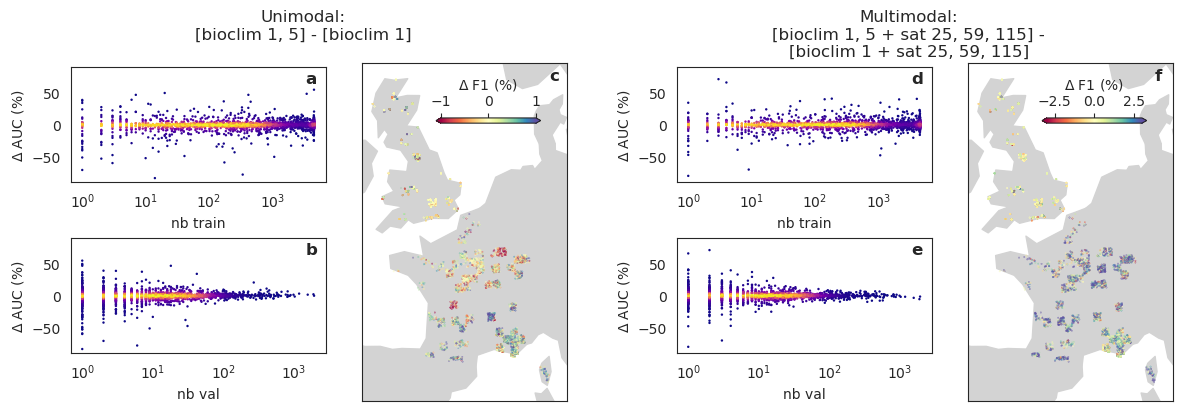

In [49]:
sns.set_style('white')
fig = plt.figure(layout='constrained', figsize=(12,4))
subfigs = fig.subfigures(1, 2, wspace=0.02)#, width_ratios=[2, 1])

subfigs[0].suptitle('Unimodal:\n[bioclim 1, 5] - [bioclim 1]\n')
subfigsnest1 = subfigs[0].subfigures(1,2, wspace=0.0, width_ratios=[1.2, 1])
ax1, ax2 = subfigsnest1[0].subplots(2,1)# sharex='col', sharey=True)
ax3 = subfigsnest1[1].subplots(1,1)

subfigs[1].suptitle('Multimodal:\n[bioclim 1, 5 + sat 25, 59, 115] -\n[bioclim 1 + sat 25, 59, 115]')
subfigsnest2 = subfigs[1].subfigures(1,2, wspace=0.0, width_ratios=[1.2, 1])
ax4, ax5 = subfigsnest2[0].subplots(2,1)
ax6 = subfigsnest2[1].subplots(1,1)

sns.scatterplot(delta_auc_env, ax=ax1, x='n_occ', y='delta_auc', hue=kde_n_occ_env, s=3, palette='plasma', edgecolors=None, linewidth=0)
sns.scatterplot(delta_auc_env, ax=ax2, x='n_val', y='delta_auc', hue=kde_n_val_env, s=3, palette='plasma', edgecolors=None, linewidth=0)
sns.scatterplot(delta_auc_bimodal, ax=ax4, x='n_occ', y='delta_auc', hue=kde_n_occ_bimodal, s=3, palette='plasma', edgecolors=None, linewidth=0)
sns.scatterplot(delta_auc_bimodal, ax=ax5, x='n_val', y='delta_auc', hue=kde_n_val_bimodal, s=3, palette='plasma', edgecolors=None, linewidth=0)
for ax, letter in zip((ax1, ax2, ax4, ax5), ['a','b','d','e']):
    ax.legend([],[], frameon=False)
    ax.set_xscale('log')
    ax.set(ylabel="$\Delta$ AUC (%)", ylim=(-90,90))
    ax.text(0.92,0.86, letter, transform=ax.transAxes, size=12, weight='bold')
for ax in (ax1, ax4): ax.set(xlabel='nb train')
for ax in (ax2, ax5): ax.set(xlabel='nb val')

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
europe = world[world.continent == "Europe"]
for ax, letter in zip((ax3, ax6), ['c','f']):
    europe.to_crs(epsg=4326).plot(ax=ax, edgecolor='lightgrey', facecolor='lightgrey')
    ax.set(xlim=(-7,11), ylim=(40.5,59.5))
    ax.set(xticklabels=[], yticklabels=[]) 
    ax.text(0.91,0.95, letter, transform=ax.transAxes, size=12, weight='bold')
gdf.plot(ax=ax3, column='delta_F1_env', cmap='Spectral', s=0.05, vmin=-1, vmax=1, legend=True, legend_kwds={
    'shrink':0.4,'location':'top','pad':-0.2, 'anchor':(0.65,1), 'extend':'both', 'label':'$\Delta$ F1 (%)'}) 
gdf.plot(ax=ax6, column='delta_F1_bimodal', cmap='Spectral', s=0.05, vmin=-3, vmax=3, legend=True, legend_kwds={
    'shrink':0.4,'location':'top','pad':-0.2, 'anchor':(0.65,1), 'extend':'both', 'label':'$\Delta$ F1 (%)'}) 

plt.savefig('figures/delta_auc_f1_env_bimodal.pdf')

Text(0.5, 0.98, 'Sat [25, 59, 115] - [115]')

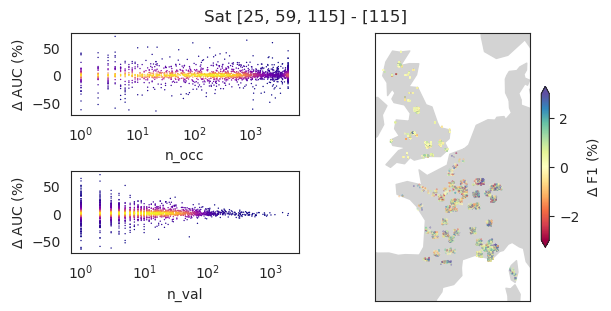

In [49]:
sns.set_style('white')
fig = plt.figure(layout='constrained', figsize=(6,3))
subfigs = fig.subfigures(1, 2, wspace=0.02)

ax1, ax2 = subfigs[0].subplots(2,1)
sns.scatterplot(delta_auc_sat, ax=ax1, x='n_occ', y='delta_auc', hue=kde_n_occ_sat, s=1, palette='plasma', edgecolors=None, linewidth=0)
sns.scatterplot(delta_auc_sat, ax=ax2, x='n_val', y='delta_auc', hue=kde_n_val_sat, s=1, palette='plasma', edgecolors=None, linewidth=0)

for ax in (ax1, ax2):
    ax.legend([],[], frameon=False)
    ax.set_xscale('log')
    ax.set(ylabel="$\Delta$ AUC (%)")

ax3 = subfigs[1].subplots(1,1)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
europe = world[world.continent == "Europe"]
europe.to_crs(epsg=4326).plot(ax=ax3, edgecolor='lightgrey', facecolor='lightgrey')
ax3.set(xlim=(-7,11), ylim=(40,60))
gdf.plot(ax=ax3, column='delta_F1_sat', cmap='Spectral', s=0.05, vmin=-3, vmax=3, legend=True, legend_kwds={
    'shrink':0.6,'location':'right', 'extend':'both', 'label':'$\Delta$ F1 (%)'})#\nBioclim [1, 5] - [5]'}) #'pad':-0.2, 'anchor':(0.75,1),
ax3.set(xticklabels=[], yticklabels=[]) 

fig.suptitle('Sat [25, 59, 115] - [115]')


# plt.savefig('figures/delta_auc_f1_env.pdf')

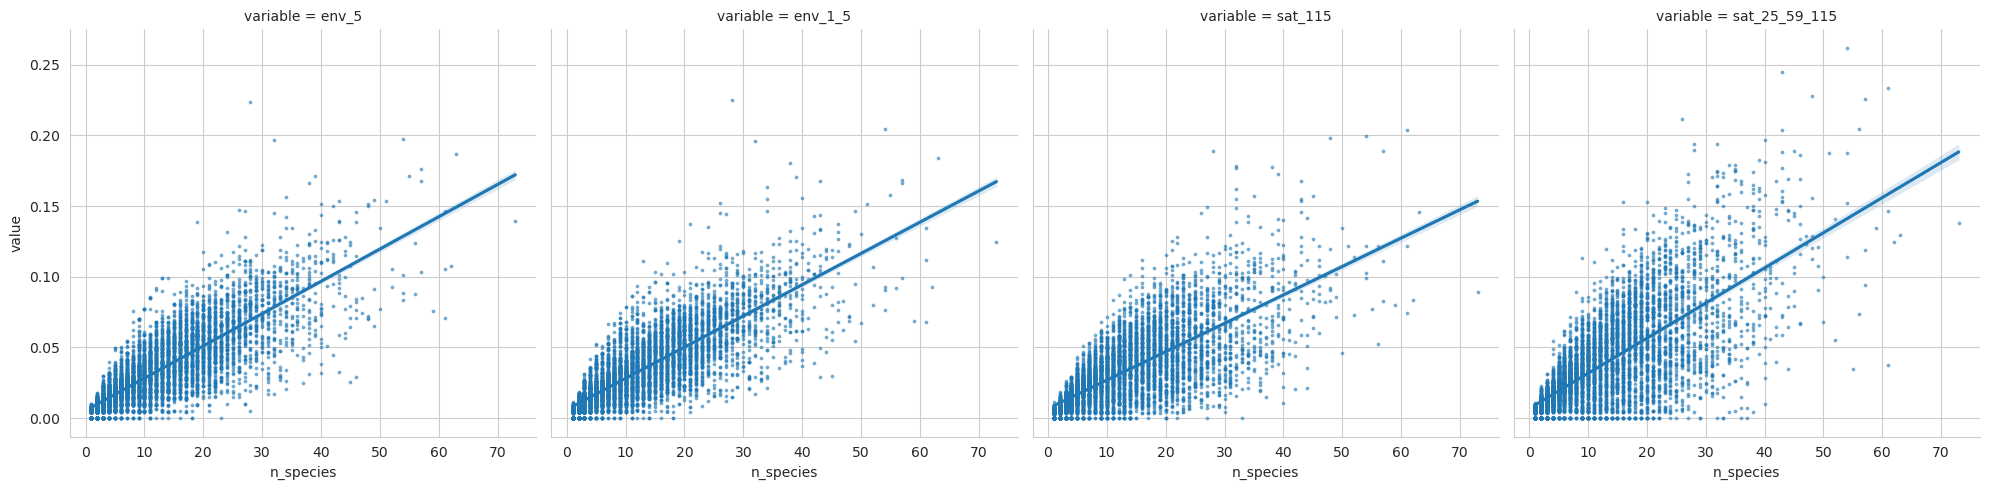

In [109]:
sns.lmplot(data=melt_df, x="n_species", y="value", col="variable", scatter_kws={'s':3,'alpha':0.5})

In [93]:
model_levels = [
    np.array(3 * ['env_1_sat_59'] + 3 * ['env_1_sat_25_59_115'] + 3 * ['env_1_5_sat_25_59_115']),
    np.array(3 * ['Bioclim','Sat','Both'])
]
#3 * ['env_1_sat_25']  +  3 * ['env_1_sat_115'] + + 3 * ['env_1_5_9_17_sat_25_59_115']
models_multimodal = {
    # '1_env_1': '0702_env_1',
    # '1_sat_25': '0704_sat_25',
    # '1_env_1_sat_25': '0701_env_1_sat_25',

    '2_env_1': '0702_env_1',
    '2_sat_59': '0704_sat_59', 
    '2_env_1_sat_59': '0703_env_1_sat_59',

    # '3_env_1': '0702_env_1',
    # '3_sat_115': '0704_sat_115',
    # '3_env_1_sat_115': '0703_env_1_sat_115',
    
    '4_env_1': '0702_env_1',
    '4_sat_25_59_115': '0704_sat_25_59_115',
    '4_env_1_sat_25_59_115': '0701_env_1_sat_25_59_115_v2',
    
    '5_env_1_5': '0702_env_1_5',
    '5_sat_25_59_115': '0704_sat_25_59_115',
    '5_env_1_5_sat_25_59_115': '0701_env_1_5_sat_25_59_115',

    # '6_env_1_5_9_17': '0702_env_1_5_9_17',
    # '6_sat_25_59_115': '0702_sat_25_59_115',
    # '6_env_1_5_9_17_sat_25_59_115': '0701_env_1_5_9_17_sat_25_59_115'
}

In [94]:
checkpoint =  'last' # 'best_val_auc' # 
auc_df_multimodal = pd.concat([
    pd.read_csv(f"models/{v}/{checkpoint}_species_auc.csv").rename(columns={"auc": k}).set_index(['species','n_occ']) for k, v in models_multimodal.items()
], axis=1)

# auc_df['env_25'] = pd.read_csv(f"models/0702_env_25/best_val_auc_species_auc.csv").rename(columns={"auc": 'env_25'}).set_index(['species','n_occ']) 
auc_df_multimodal['2_sat_59'] = pd.read_csv(f"models/0704_sat_59/best_val_auc_species_auc.csv").rename(columns={"auc": 'sat_59'}).set_index(['species','n_occ']) 

auc_df_multimodal.columns = model_levels
auc_df_multimodal

env_1_sat_59                     env_1_sat_25_59_115            \
                   Bioclim       Sat      Both             Bioclim       Sat   
species n_occ                                                                  
1       2261      0.827572  0.846312  0.836225            0.827572  0.890159   
5       4529      0.546423  0.603756  0.657770            0.546423  0.634323   
10      2162      0.947397  0.934939  0.942661            0.947397  0.937441   
11      4508      0.704472  0.689381  0.714104            0.704472  0.659649   
24      4539      0.812850  0.667173  0.807319            0.812850  0.683435   
...                    ...       ...       ...                 ...       ...   
10028   204       0.954360  0.926743  0.975476            0.954360  0.973055   
10031   20        0.234100  0.872933  0.778540            0.234100  0.900901   
10035   110       0.402549  0.495983  0.419673            0.402549  0.470022   
10038   10        0.978083  0.857066  0.986823            0.978083  0.845233   
10039   2944      0.777705  0.728509  0.788933            0.777705  0.700951   

                        env_1_5_sat_25_59_115                      
                   Both               Bioclim       Sat      Both  
species n_occ                                                      
1       2261   0.861914              0.841246  0.890159  0.865680  
5       4529   0.595155              0.560585  0.634323  0.524573  
10      2162   0.922669              0.922185  0.937441  0.910965  
11      4508   0.735990              0.721606  0.659649  0.678441  
24      4539   0.830540              0.832507  0.683435  0.809814  
...                 ...                   ...       ...       ...  
10028   204    0.939834              0.991571  0.973055  0.926653  
10031   20     0.657254              0.733629  0.900901  0.746941  
10035   110    0.460868              0.457361  0.470022  0.421871  
10038   10     0.994890              0.966519  0.845233  0.884228  
10039   2944   0.778694              0.700994  0.700951  0.759259  

[2174 rows x 9 columns]

In [95]:
melt_df = pd.melt(auc_df_multimodal.reset_index(), id_vars=['species','n_occ'], var_name=['model','modality'], value_name='AUC')
melt_df['AUC'] = melt_df['AUC'].round(3) * 100
melt_df

,species,n_occ,model,modality,AUC
0,1,2261,env_1_sat_59,Bioclim,82.8
1,5,4529,env_1_sat_59,Bioclim,54.6
2,10,2162,env_1_sat_59,Bioclim,94.7
3,11,4508,env_1_sat_59,Bioclim,70.4
4,24,4539,env_1_sat_59,Bioclim,81.3
...,...,...,...,...,...
19561,10028,204,env_1_5_sat_25_59_115,Both,92.7
19562,10031,20,env_1_5_sat_25_59_115,Both,74.7
19563,10035,110,env_1_5_sat_25_59_115,Both,42.2
19564,10038,10,env_1_5_sat_25_59_115,Both,88.4


In [96]:
f1_scores = []
for k, v in models_multimodal.items():
    if v == '0704_sat_59':
        f1s = np.load(f"models/{v}/f1_scores_best_val_auc.npy") # last.npy") #
    else:
        f1s = np.load(f"models/{v}/f1_scores_last.npy") #best_val_auc.npy") #
    f1_scores.append(f1s[1,np.argwhere((f1s[0] < 0.52) & (f1s[0] > 0.48))][0][0].round(4) * 100)
    
test_f1_scores = [
    # 2.37, 1.69, 2.42,
    2.37, 1.98, 2.30,
    # 2.37, 2.00, 1.93,
    2.37, 2.25, 2.23,
    2.39, 2.25, 2.77,
    # 2.35, 2.25, 2.46
]

median_f1 = pd.DataFrame({'F1': f1_scores, 'test_F1': test_f1_scores}, index=model_levels).reset_index().rename(columns={'level_0':'model','level_1':'modality'})
median_f1

,model,modality,F1,test_F1
0,env_1_sat_59,Bioclim,3.05,2.37
1,env_1_sat_59,Sat,2.88,1.98
2,env_1_sat_59,Both,3.15,2.30
3,env_1_sat_25_59_115,Bioclim,3.05,2.37
4,env_1_sat_25_59_115,Sat,3.53,2.25
5,env_1_sat_25_59_115,Both,2.92,2.23
6,env_1_5_sat_25_59_115,Bioclim,3.13,2.39
7,env_1_5_sat_25_59_115,Sat,3.53,2.25
8,env_1_5_sat_25_59_115,Both,3.86,2.77


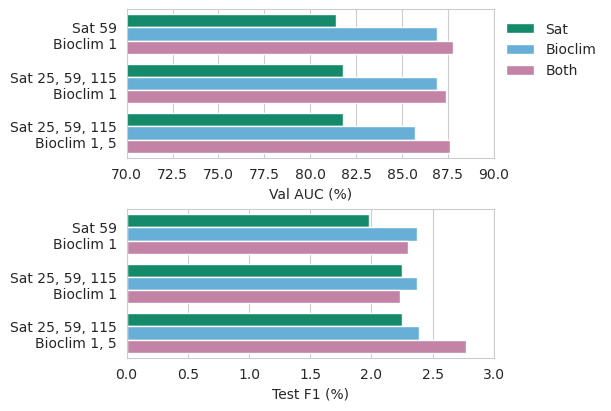

In [97]:
sns.set_style('whitegrid')
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(6,4), layout='constrained')

sns.barplot(melt_df, ax=ax1, y='model', x='AUC', hue='modality', hue_order=['Sat','Bioclim','Both'], estimator='median', errorbar=None, palette=['#009E73', '#56B4E9', '#CC79A7'])
# ax1.bar_label(ax1.containers[0], fontsize=10, padding=6)
# ax1.bar_label(ax1.containers[1], fontsize=10, padding=6)
# ax1.bar_label(ax1.containers[2], fontsize=10, padding=6)
ax1.set(xlim=(70,90), yticklabels=['Sat 59\nBioclim 1',  'Sat 25, 59, 115\nBioclim 1','Sat 25, 59, 115\nBioclim 1, 5'], ylabel=None, xlabel='Val AUC (%)')
#'Sat 25\nBioclim 1', 'Sat 115\nBioclim 1', , 'Sat 25, 59, 115\nBioclim 1, 5, 9, 17'
sns.move_legend(ax1, "upper left", bbox_to_anchor=(1, 1), title=None, frameon=False)
# ax1.legend_.remove()

sns.barplot(median_f1, ax=ax2, y='model', x='test_F1', hue='modality', hue_order=['Sat','Bioclim','Both'], palette=['#009E73', '#56B4E9', '#CC79A7'])
sns.move_legend(ax2, "upper left", bbox_to_anchor=(1, 1), title='Modalities', frameon=False)
ax2.set(xlim=(0,3), yticklabels=['Sat 59\nBioclim 1', 'Sat 25, 59, 115\nBioclim 1','Sat 25, 59, 115\nBioclim 1, 5'], ylabel=None,  xlabel='Test F1 (%)')
# ax2.bar_label(ax2.containers[0], fontsize=10, padding=6)
# ax2.bar_label(ax2.containers[1], fontsize=10, padding=6)
# ax2.bar_label(ax2.containers[2], fontsize=10, padding=6)
ax2.legend_.remove()

# plt.savefig('figures/multimodal_halfwidth.pdf')

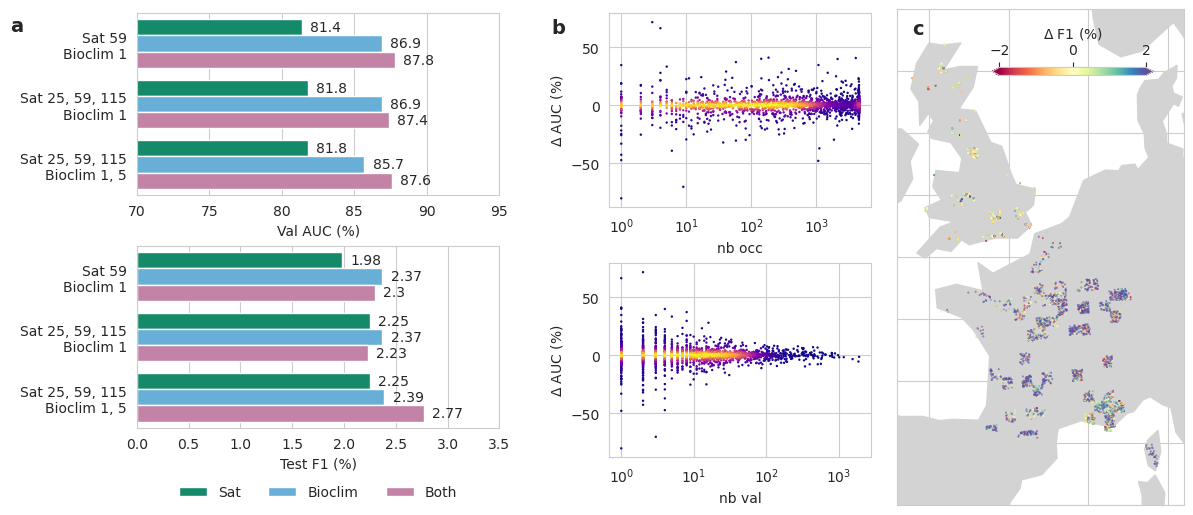

In [184]:
sns.set_style('whitegrid')
fig = plt.figure(layout='constrained', figsize=(12,5))
subfigs = fig.subfigures(1, 2, wspace=0.05, width_ratios=[1,1.3])

# subfigs[0].suptitle('(a) Uni- vs. bi-modal models')
(ax1, ax2) = subfigs[0].subplots(2,1)

sns.barplot(melt_df, ax=ax1, y='model', x='AUC', hue='modality', hue_order=['Sat','Bioclim','Both'], estimator='median', errorbar=None, palette=['#009E73', '#56B4E9', '#CC79A7'])
# ax1.set(xlim=(70,90), yticklabels=['(i) Bioclim 1 +\nSat 59',  '(ii) Bioclim 1 +\nSat 25, 59, 115','(iii) Bioclim 1, 5 +\nSat 25, 59, 115'], ylabel=None, xlabel='Val AUC (%)')
ax1.bar_label(ax1.containers[0], fontsize=10, padding=6)
ax1.bar_label(ax1.containers[1], fontsize=10, padding=6)
ax1.bar_label(ax1.containers[2], fontsize=10, padding=6)
ax1.set(xlim=(70,95), yticklabels=['Sat 59\nBioclim 1',  'Sat 25, 59, 115\nBioclim 1','Sat 25, 59, 115\nBioclim 1, 5'], ylabel=None, xlabel='Val AUC (%)')
# sns.move_legend(ax1, "upper center", bbox_to_anchor=(0.5, 1.2), ncol=3, title=None, frameon=False)
ax1.legend_.remove()
sns.barplot(median_f1, ax=ax2, y='model', x='test_F1', hue='modality', hue_order=['Sat','Bioclim','Both'], palette=['#009E73', '#56B4E9', '#CC79A7'])
ax2.bar_label(ax2.containers[0], fontsize=10, padding=6)
ax2.bar_label(ax2.containers[1], fontsize=10, padding=6)
ax2.bar_label(ax2.containers[2], fontsize=10, padding=6)
ax2.set(xlim=(0,3.5), yticklabels=['Sat 59\nBioclim 1',  'Sat 25, 59, 115\nBioclim 1','Sat 25, 59, 115\nBioclim 1, 5'], ylabel=None,  xlabel='Test F1 (%)')
# sns.move_legend(ax2, "upper left", bbox_to_anchor=(1, 1), title=None, frameon=False)
sns.move_legend(ax2, 'upper center', bbox_to_anchor=(0.5, -0.25), ncol=3,  title=None, frameon=False)#, shadow=True, ncol=5)
# ax2.legend_.remove()
ax1.text(-0.35,0.9, 'a', transform=ax1.transAxes, size=14, weight='bold')
# ax2.text(-0.35,0.9, 'b', transform=ax2.transAxes, size=14, weight='bold')

# subfigs[1].suptitle('(b) Comparison of two bi-modal models:\nSat 25, 59, 115 + Bioclim 1 vs. Sat 25, 59, 115 + Bioclim 1, 5')
subfignest = subfigs[1].subfigures(1,2, wspace=0.0)
(ax3, ax4) = subfignest[0].subplots(2,1)

sns.scatterplot(delta_auc_bimodal, ax=ax3, x='n_occ', y='delta_auc', hue=kde_n_occ_bimodal, s=3, palette='plasma', edgecolors=None, linewidth=0)
sns.scatterplot(delta_auc_bimodal, ax=ax4, x='n_val', y='delta_auc', hue=kde_n_val_bimodal, s=3, palette='plasma', edgecolors=None, linewidth=0)
ax3.set(xlabel='nb occ', ylabel="$\Delta$ AUC (%)")
ax4.set(xlabel='nb val', ylabel="$\Delta$ AUC (%)")
for ax in (ax3, ax4):
    ax.legend([],[], frameon=False)
    ax.set_xscale('log')
ax3.text(-0.22,0.9, 'b', transform=ax3.transAxes, size=14, weight='bold')
# ax4.text(-0.2,0.9, 'd', transform=ax4.transAxes, size=14, weight='bold')

ax5 = subfignest[1].subplots(1,1)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
europe = world[world.continent == "Europe"]
europe.to_crs(epsg=4326).plot(ax=ax5, edgecolor='lightgrey', facecolor='lightgrey')
ax5.set(xlim=(-7,11), ylim=(40,60))
gdf.plot(ax=ax5, column='delta_F1_bimodal', cmap='Spectral', s=0.1, vmin=-2, vmax=2, legend=True, legend_kwds={
    'shrink':0.5,'location':'top','pad':-0.15, 'anchor':(0.7,1), 'extend':'both', 'label':'$\Delta$ F1 (%)'}) 
ax5.set(xticklabels=[], yticklabels=[]) 
ax5.text(0.05,0.95, 'c', transform=ax5.transAxes, size=14, weight='bold')

plt.savefig('figures/multimodal.pdf')